In [1]:
from IPython.core.display import HTML
def css_styling():
    try:
        with open("tma4125.css", "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass #Do nothing

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

# Exercises 3

Submission deadline: **Feb 15 2021 at 12:00 (noon)**

In this exercise set we will construct and analyze quadrature rules. For guidance on quadrature rules, please read the lecture notes. Make sure to run the code below to get all the important modules, and to make the plots look nice.

In [2]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

## 1) Analyzing the composite Simpson's rule

Simpson's rule is defined as
$$
S[f](x_{i-1}, x_i) = \frac{h}{6}(f(x_{i-1} + 4f(x_{i-1/2}) + f(x_i))
$$
where $h = x_i - x_{i-1}$ and $x_{i-1/2} = \frac{x_{i-1}+x_i}{2}.$


**a)**

Show that the resulting composite Simpson's rule is given by

\begin{align*}
\int_a^b f {\,\mathrm{d}x} \approx \mathrm{CSR}[f]({[x_{i-1}, x_i]}_{i=1}^{m})
&= 
\tfrac{h}{6}
[
f(x_0)
+ 4f(x_{x_{1/2}}) + 2f(x_1) 
+ 4f(x_{3/2}) +     2f(x_2)
+ \ldots
\\ 
&\qquad+2 f(x_{m-1})
+
4f(x_{x_{m-1/2}}) 
+f(x_m)
].
\end{align*}

![image.png](Bilder/3-1a.PNG)

**b)**
Implement the composite Simpson's rule.
Use this function to compute an approximate value of integral

$$
I(0,1) = \int_0^1 \cos\left(\frac{\pi}{2}x\right) = \frac{2}{\pi} = 0.636619\dotsc.
$$

for $m = 4, 8, 16, 32, 64$ corresponding to
$ h = 2^{-2}, 2^{-3}, 2^{-4}, 2^{-5}, 2^{-6}$.
Tabulate the corresponding quadrature errors $|I(0,1) - Q(0,1)|$. Plot the errors against $h$.
What do you observe? How does it compare to the composite trapezoidal rule?

--------------------------------
0.6284174365157311
Number of subintervals m = 4
CT[f] = 0.6284174365157311
I[f] - CT[f] = 8.2023358519e-03
CS[f] = 0.6366250534621614
I[f] - CS[f] = -5.2810945800e-06
--------------------------------
0.6345731492255537
Number of subintervals m = 8
CT[f] = 0.6345731492255537
I[f] - CT[f] = 2.0466231420e-03
CS[f] = 0.6366201012992816
I[f] - CS[f] = -3.2893170021e-07
--------------------------------
0.6361083632808496
Number of subintervals m = 16
CT[f] = 0.6361083632808496
I[f] - CT[f] = 5.1140908673e-04
CS[f] = 0.6366197929081189
I[f] - CS[f] = -2.0540537493e-08
--------------------------------
0.6364919355013015
Number of subintervals m = 32
CT[f] = 0.6364919355013015
I[f] - CT[f] = 1.2783686628e-04
CS[f] = 0.6366197736510887
I[f] - CS[f] = -1.2835073004e-09
--------------------------------
0.636587814113642
Number of subintervals m = 64
CT[f] = 0.636587814113642
I[f] - CT[f] = 3.1958253939e-05
CS[f] = 0.6366197724477962
I[f] - CS[f] = -8.0214834774e-11

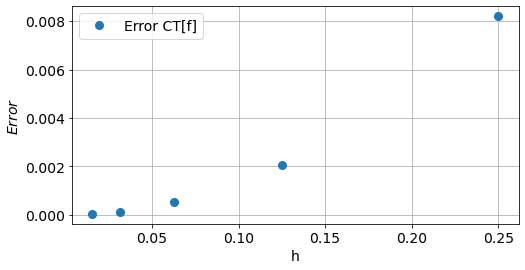

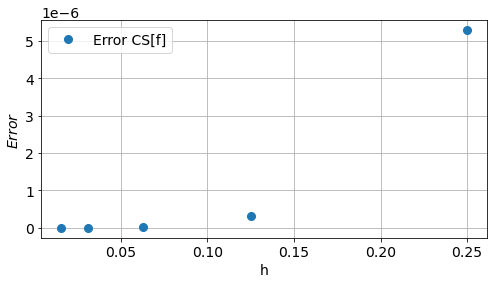

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Henter inn kode fra forelesningene for å legge inn composite trapezoidal rule.:
def CT(f, a, b, m):
    """ Computes an approximation of the integral f
    using the composite trapezoidal rule.
    Input:
        f:  integrand
        a:  left interval endpoint
        b:  right interval endpoint
        m:  number of subintervals
    """
    x = np.linspace(a,b,m+1)
    h = float(b - a)/m
    fx = f(x[1:-1])
    ct = h*(np.sum(fx) + 0.5*(f(x[0]) + f(x[-1])))
    print(ct)
    return ct

#Definerer sammensatt simpsons regel:
def CS(f, a, b, m):
    x = np.linspace(a,b,m+1)
    h = float(b - a)/m
    fx = f(x[1:-1])
    x_halves = np.array([(x[i]+x[i-1])/2 for i in range(1,len(x))])
    fx_halves = f(x_halves)
    cs = h/6*(f(x[0]) + 4*np.sum(fx_halves) + 2*np.sum(fx) + f(x[-1]))
    return cs

#Definerer funksjonen:
def f(x):
    return np.cos(np.pi*x/2)

#Legger inn den ekstakte verdien av integralet gitt i oppgava
int_f = 2/np.pi 

#Integrasjonsintervallet
a, b = 0, 1
#Modifisert kode fra forelesning for printing av resultatene og feilene.
ErrorsT = []
ErrorsS = []
H = []
for m in [4, 8, 16, 32, 64]:
    print('--------------------------------')
    h = (b-a)/m
    H.append(h)
    Trapezoidal = CT(f, a, b, m)
    Simpsons = CS(f, a, b, m)
    ErrorT = int_f - Trapezoidal
    ErrorsT.append(ErrorT)
    ErrorS = int_f - Simpsons
    ErrorsS.append(abs(ErrorS))
    print("Number of subintervals m = {}".format(m))
    print("CT[f] = {}".format(Trapezoidal))
    print("I[f] - CT[f] = {:.10e}".format(ErrorT))
    print("CS[f] = {}".format(Simpsons))
    print("I[f] - CS[f] = {:.10e}".format(ErrorS))

plt.plot(H, ErrorsT,'o', label = "Error CT[f]")
plt.xlabel('h')
plt.ylabel('$Error$')
plt.legend()
plt.show()

plt.plot(H, ErrorsS,'o', label = "Error CS[f]")
plt.xlabel('h')
plt.ylabel('$Error$')
plt.legend()
plt.show()

#### Ser at feilen til CS[f] generelt er mindre enn CT[f] i tillegg til at når h avtar, så synker CS[f] sin feil raskere enn CT[f]. Dette kommer av at feilen til CS er proporsjonal med $h^4$ imens feilen til CT er proporsjonal med $h^2$.

Doubling the number of sub-intervals decreases the error by a factor of 16. This suggests that the error of the composite Simpson rule is $Cm^{-4} = Ch^4$.

**c)**
Recall that the error of Simpson's rule on a single interval is given by

$$
|I[f](a,b) - S[f](a,b)| = - \frac{(b-a)^5}{2880}  f^{(4)}(\xi)
$$
for some $\xi \in [a,b]$.

Use this to show that the error of the composite Simpson rule can be bounded by

\begin{equation}
|I[f]-\mathrm{CSR}[f]|
\leqslant
\dfrac{M_4}{2880} \dfrac{(b-a)^5}{m^4}
=
\dfrac{M_4}{2880}
h^4(b-a)
\label{quad:thm:csr_est} \tag{3}
\end{equation}

where  $M_4 = \max_{\xi\in[a,b]} |f^{(4)}(\xi)|$.

![image.png](Bilder/3-1c.PNG)

## 2) Gaussian Quadrature

In this exercise we will construct a Gaussian quadrature rule with 3 nodes. We will take it step by step, so don't worry if you do not feel like an expert on Gaussian quadrature. 

To make your life easy, we will use the [sympy](https://docs.sympy.org/latest/index.html#) python module  for symbolic mathematics to perform tasks such as (symbolic) integration and root finding of low order polynoms. 
In particular look at [integrate](https://docs.sympy.org/latest/modules/integrals/integrals.html) and [solve](https://docs.sympy.org/latest/modules/solvers/solvers.html) submodules.



The first step in constructing a Gaussian quadrature is finding the correct orthogonal polynomial. The nodes of the quadrature rule will be the roots of some polynomial. Since we are looking for 3 nodes, this means that the polynomial should have 3 roots, and hence we are looking for a third-order polynomial.
 
The polynomial, call it $p_3$, should be orthogonal on the interval $[0,3]$ to all polynomials of order 2 or less. We now create this polynomial.

Start with the 4 polynomial "basis" functions 
$$
\phi_0 = 1,\quad \phi_1 = x,\quad \phi_2 = x^2,\quad \phi_3 = x^3.
$$
Remember that on the interval $[0,3]$ we have the *inner product*
$$
(p,q) = \int_{0}^3p(x)\,q(x)\,\mathrm{d}x
$$
and the *norm*
$$
\|p\| = \left(\int_{0}^3 p(x)^2 \, \mathrm{d}x\right)^{1/2}.
$$

We can now construct orthogonal polynomials by using Gram-Schmidt orthogonalization.

\begin{align*}
p_k = \phi_k - \sum_{j=0}^{k-1}\frac{(\phi_k,p_j)}{\|p_j\|^2}\, p_j
\end{align*}

We start out by setting $p_0 = 1$. In order to calculate $p_1$ we first need to calculate
$$
(\phi_1,p_0) = \int_{0}^3\phi_1(x)\,p_0(x)\, \mathrm{d}x = \int_{0}^3 x \cdot 1 \, \mathrm{d}x = \left[\frac{x^2}{2}\right]^3_{0} = \frac{9}{2}.
$$
We also need to calculate
$$
\|p_0\|^2 = \int_{0}^3p_0(x)^2 \, \mathrm{d}x = \int_{0}^3 1\cdot 1 \mathrm{d}x = 3.
$$
Therefore, 
$$
p_1 = \phi_1 - \frac{(\phi_1,p_0)}{\|p_0\|^2}\,p_0 = \phi_1 - \frac{9/2}{3}\cdot p_0 = \phi_1 - \frac{3}{2}p_0 = x-\frac{3}{2}.
$$

**a)**

Use Gram-Schmidt orthogonalization to construct $p_2$ and $p_3$.

We can use the Python package SymPy to check our calculations. The code below helps you by defining the inner product and shows how to define polynomials.

In [4]:
from sympy.abc import x
from sympy import integrate

a=0
b=3

#Define the inner poduct
def scp(p,q):
    return integrate(p*q, (x, a, b))

#Define polynomials
p0 = 1
p1 = x

#Calculate the inner product and print it.
print(scp(p0,p1))

9/2


![image.png](Bilder/3-2a.PNG)

#### Får at $p_2 = x^2 -3x + \frac{3}{2}$ og $p_3 = x^3 -\frac{9}{2}x^2 + \frac{27}{5}x - \frac{27}{20}$<br> 


**b)**
Use the function $\texttt{scp}$ to check whether the polynomials you calculated
are in fact **orthogonal**.

In [5]:
#Funksjonen er allerede på plass fra koden gitt i a) bruker den til å sjekke at de er ortogonale, altså må scp gi 0.

p0 = 1
p1 = x - 3/2
p2 = x**2 - 3*x + 3/2
p3 = x**3 - (9/2)*(x**2) + (27/5)*x - 27/20

print(scp(p0,p2))
print(scp(p1,p2))
print(scp(p0,p3))
print(scp(p1,p3))
print(scp(p2,p3))

0
0
-3.55271367880050e-15
0
-5.68434188608080e-14


#### En kan se at de verdiene som ikke er 0 er veldig små. De er ikke lik 0 på grunn av begrensninger med binære tall. Hvis man sjekke disse indreproduktene i andre integralløsere får man 0 som svar.


**c)**
Find the 3 roots of $p_3$.

*Hints:*

 - Analytical approach: If you want to do it analytical, use the fact that one root is $$x=\frac{3}{2}$$
to find a second order polynomial $\widetilde{p}_2$ such that  $\widetilde{p}_2(x) \cdot (x-3/2) = p_3(x)$.
 - Computational approach: 
If you want to use a computational algebra system/symbolic calculator
you Import the `solve` from `sympy` (Have a look at the
[solve](https://docs.sympy.org/latest/modules/solvers/solvers.html) submodules.)

In [6]:
from sympy import solve

root1, root2, root3 = solve(p3,x)
print(root1)
print(root2)
print(root3)

0.338104996137775
1.50000000000000
2.66189500386223


#### Hvis man løser analytisk så vil eksaktverdiene til de to siste røttene være: $x=\frac{3\left(5+\sqrt{15}\right)}{10},\:x=\frac{3\left(5-\sqrt{15}\right)}{10}$



**d)**

Let's denote the three roots of $p_3$ by $x_1,x_2,x_3.$

Construct the three Lagrange polynomials $L_1, \, L_2,\,  L_3$ satisfying $L_i(x_j) = \delta_{ij},$ that is

$$
L_i(x_j) = 
\begin{cases}
1,\quad i=j,\\
0,\quad i\neq j.
\end{cases}
$$

Then calculate the weights 
$$
w_i = \int_{0}^3L_i(x)\, \mathrm{d}x.
$$

*Hint: You can use the SymPy function $\texttt{integrate}$ to check your calculations.*

![image.png](Bilder/3-2d.PNG)

In [7]:
#Sjekker vektene:
import numpy as np
L1 = 10/27 * (x**2 - (3 + 3*np.sqrt(15)/10)*x + 9*(5+np.sqrt(15))/20)
L2 = -20/27* (x**2 -3*x + 9/10)
L3 = 10/27 * (x**2 - (3 - 3*np.sqrt(15)/10)*x + 9*(5-np.sqrt(15))/20)

g = integrate(L1, (x, 0, 3))
h = integrate(L2, (x, 0, 3))
i = integrate(L3, (x, 0, 3))

print(g)
print(h)
print(i)


0.833333333333332
1.33333333333333
0.833333333333333


#### Ser at disse stemmer overens med beregningene.


**e)** 

Now recheck your calculations as follows.
The Gauss-Legendre rule for the interval $[-1,1]$ with $3$ quadrature points is given by
\begin{align*}
\{\hat{x}_i\}_{i=0}^2 &= \left\{-\sqrt{\tfrac{3}{5}}, 0, \sqrt{\tfrac{3}{5}} \right\}
\\
\{\hat{w}_i\}_{i=0}^2 &= \left\{ \tfrac{5}{9}, \tfrac{8}{9}, \tfrac{5}{9} \right\}
\end{align*}
Now transfer this quadrature rule to the interval $[0,3]$ and confirm that you get the same quadrature points and weights you computed in 2a)-2d).

![image.png](Bilder/3-2e.PNG)

**f)**

Finally, write down the quadrature rule on the form

$$
\mathrm{GQR}[f](0,3) = \sum_{j=1}^nw_jf(x_j).
$$

and check that this Gaussian quadrature rule has degree of exactness equal to $5$.

*Hint: Use the `QR` function from the `SimpleQuadrature.ipynb` notebook.*

In [8]:
#Henter QR funksjonen:
def QR(f, xq, wq):
    """ Computes an approximation of the integral f
    for a given quadrature rule.
    
    Input:
        f:  integrand
        xq: quadrature nodes
        wq: quadrature weights
    """
    n = len(xq)
    if (n != len(wq)):
        raise RuntimeError("Error: Need same number of quadrature nodes and weights!")
    return np.array(wq)@f(np.array(xq))

xq = [3*(5-sqrt(15))/10 , 3/2, 3*(5+sqrt(15))/10]
wq = [5/6, 4/3, 5/6]

for m in range(8):
    def f(x):
        return x**m
    g = x**m
    int_f = integrate(g, (x, 0, 3))
    
    qr_f = QR(f, xq, wq)
    print(f"Når m er {m}, blir feilen: {int_f-qr_f}")

Når m er 0, blir feilen: 0
Når m er 1, blir feilen: 0
Når m er 2, blir feilen: 1.77635683940025E-15
Når m er 3, blir feilen: 7.10542735760100E-15
Når m er 4, blir feilen: 2.84217094304040E-14
Når m er 5, blir feilen: 8.52651282912120E-14
Når m er 6, blir feilen: 0.781071428571693
Når m er 7, blir feilen: 8.20125000000075


#### Ser at når m er mindre enn eller lik 5 er feilen såpass liten at den antakeligvis skyldes avrundingfeil grunnet det binære systemet. Når m er 6 blir feilen brått veldig stor. Dermed har regelen "degree of exactness" på 5.